# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | gao
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | labutta
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | mujiayingzi
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | ewa beach
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | matara
Processing Record 20 of Set 1 | puerto ayora
Processing Record

Processing Record 40 of Set 4 | prince rupert
Processing Record 41 of Set 4 | ukiah
Processing Record 42 of Set 4 | karaul
City not found. Skipping...
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | harnosand
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | sabang
Processing Record 50 of Set 4 | svetlogorsk
Processing Record 1 of Set 5 | gasa
Processing Record 2 of Set 5 | sherbrooke
Processing Record 3 of Set 5 | tacoronte
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | marystown
Processing Record 6 of Set 5 | khasan
Processing Record 7 of Set 5 | kungurtug
Processing Record 8 of Set 5 | abhaynagar
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | maragogi
Processing Record 11 of Set 5 | dholka
Processing Record 12 of Set 5 | port lincoln
Processing Record 13 of Set 

Processing Record 28 of Set 8 | cerna hora
Processing Record 29 of Set 8 | bilma
Processing Record 30 of Set 8 | bodden town
Processing Record 31 of Set 8 | lampa
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | kula
Processing Record 35 of Set 8 | milkovo
Processing Record 36 of Set 8 | bousso
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | mahibadhoo
Processing Record 40 of Set 8 | sibolga
Processing Record 41 of Set 8 | nisia floresta
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | arequipa
Processing Record 44 of Set 8 | dalby
Processing Record 45 of Set 8 | weatherford
Processing Record 46 of Set 8 | port-gentil
Processing Record 47 of Set 8 | komsomolskiy
Processing Record 48 of Set 8 | benghazi
Processing Record 49 of Set 8 | bayangol
Processing Record 50 of Set 8 | saint-pierre
Processing Record 1 of Set 9 | gatesville
Proc

City not found. Skipping...
Processing Record 24 of Set 12 | kovdor
Processing Record 25 of Set 12 | lewiston
Processing Record 26 of Set 12 | kishapu
Processing Record 27 of Set 12 | sumbe
Processing Record 28 of Set 12 | ekhabi
Processing Record 29 of Set 12 | san vicente
Processing Record 30 of Set 12 | codrington
------------------------------------------------
Data Retrieval Complete
------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          540
Lat           540
lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64


In [21]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head(600)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nishihara,26.1842,127.7558,15.00,67.0,90.0,5.14,JP,1.610837e+09
1,busselton,-33.6500,115.3333,16.67,72.0,0.0,2.24,AU,1.610837e+09
2,vardo,70.3705,31.1107,1.76,86.0,100.0,7.96,NO,1.610837e+09
3,ust-nera,64.5667,143.2000,-35.44,74.0,100.0,1.90,RU,1.610837e+09
4,port hardy,50.6996,-127.4199,7.00,87.0,90.0,8.23,CA,1.610837e+09
...,...,...,...,...,...,...,...,...,...
535,kishapu,-3.6167,33.8667,18.49,90.0,27.0,1.46,TZ,1.610837e+09
536,sumbe,-11.2061,13.8437,23.40,85.0,31.0,4.20,AO,1.610837e+09
537,ekhabi,53.5102,142.9671,-28.24,87.0,35.0,5.56,RU,1.610837e+09
538,san vicente,-26.6167,-54.1333,23.72,86.0,39.0,1.41,AR,1.610837e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
df=weather_df['Humidity']
df

0      67.0
1      72.0
2      86.0
3      74.0
4      87.0
       ... 
535    90.0
536    85.0
537    87.0
538    86.0
539    62.0
Name: Humidity, Length: 540, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

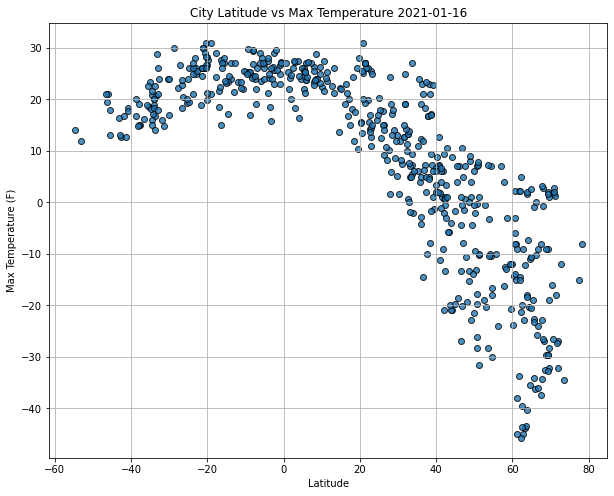

In [31]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

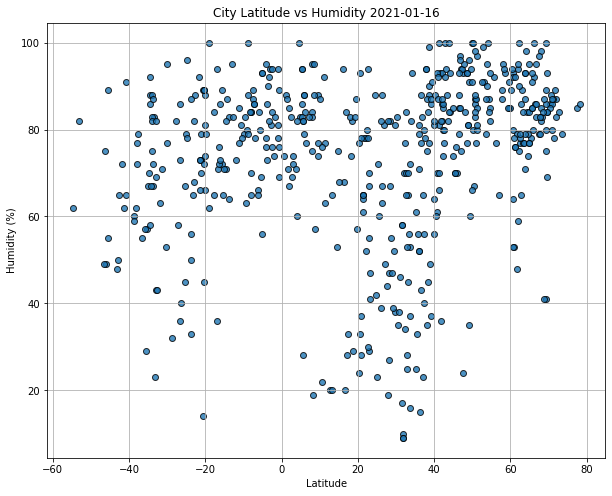

In [32]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

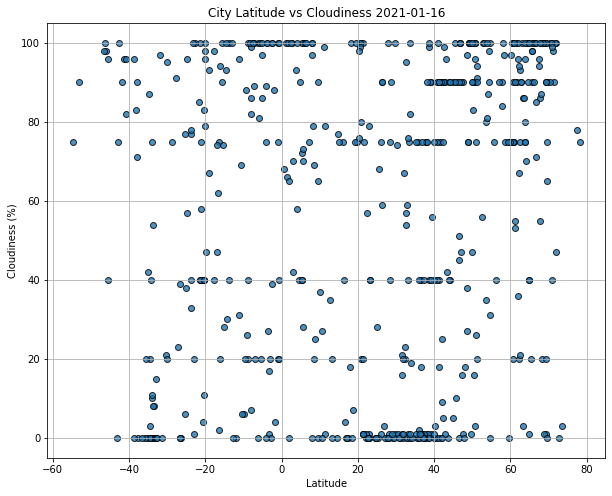

In [33]:

# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

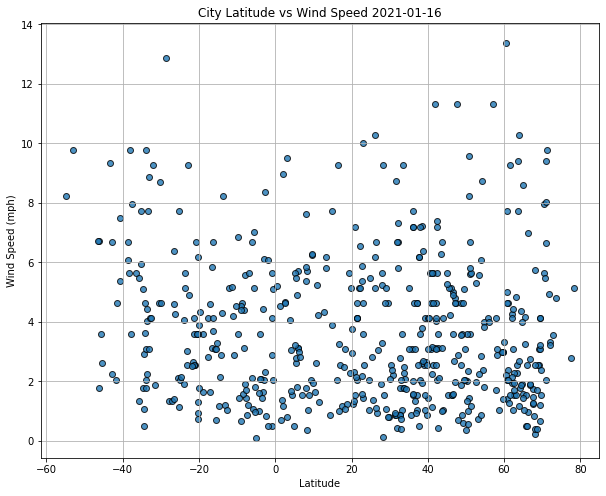

In [34]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression